## Target Hypothesis

The most optimal model is found on the data where there are 2 rows of CO applicant --> BRFE (RF)

NOW DO THIS -->

1. Score both Main & Co as two seperate customers

bs = fit(bs)

ws = fit(ws)




2. Make a model of both with Co as a dummy


bs = xtrain (bs,ws)


2.1 

    ws input 0


    if 1 Applicant:

        bs = xtrain (bs,0)

    else:

        bs = xtrain (bs,ws)


2.2  --> could be adversed selection due to that having a co applicant might say something about the relasionship between the two

    ws - applications with co -applicant and for these take the mean 


    if 1 Applicant:

        bs = xtrain (bs,mean(ws))

    else:

        bs = xtrain (bs,ws)




3. Worst 

if main = main:

else:

    ws




4. Best --makes sence     1. Main -- Always main -->  2. CO --> best score 


if main = main:

else:

    bs



5. Test two seperate scorecards for main & co

5.1 

     main = main 

     Co --> Best 

5.2

     main = main 

     Co --> CO 




In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import os
import sqlalchemy as sa
import pyodbc
import warnings
import urllib
warnings.filterwarnings('ignore')

path = "./Classes"
os.chdir(path)

from HYPERTUNNER import ModelOptimizer
from DATAPREPROCESSOR import DataPreprocessor
from MODEL_FEATURE_EVALUATOR import ModelEvaluator ,FeatureImportance


iterations = 200




################### GET PAYMENT DATA ##########################

path = "../../1. Data/Cleaned Transaction Data"
os.chdir(path)


df = pd.read_excel('PreeProcessed_Psd2.xlsx')
#df = df.drop(columns=['ReceivedDate','AccountNumber','ApplicationID','SSN','DisbursedDate','Amount','IsMainApplicant','ApplicantNo','NR','_merge','HasCoapp'])


import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, roc_auc_score, roc_curve
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold, cross_val_score
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt


# Custom Gini coefficient scorer
def gini_scorer(y_true, y_pred):
    auc = roc_auc_score(y_true, y_pred)
    return 2 * auc - 1

# Ensure the custom scorer is correctly created
gini_score = make_scorer(gini_scorer, needs_proba=True, greater_is_better=True)



# Function to plot Gini coefficient
def plot_gini(model, X_train, y_train, X_val, y_val, X_test, y_test, title):
    y_train_pred_proba = model.predict_proba(X_train)[:, 1]
    y_val_pred_proba = model.predict_proba(X_val)[:, 1]
    y_test_pred_proba = model.predict_proba(X_test)[:, 1]

    gini_train = gini_scorer(y_train, y_train_pred_proba)
    gini_val = gini_scorer(y_val, y_val_pred_proba)
    gini_test = gini_scorer(y_test, y_test_pred_proba)
    
    auc_train = (gini_train + 1) / 2  # Convert Gini to AUC
    auc_val = (gini_val + 1) / 2  # Convert Gini to AUC
    auc_test = (gini_test + 1) / 2  # Convert Gini to AUC

    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
    fpr_val, tpr_val, _ = roc_curve(y_val, y_val_pred_proba)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_proba)

    plt.figure()
    plt.plot(fpr_train, tpr_train, label=f'Training ROC curve (AUC = {auc_train:.2f}, Gini = {gini_train:.2f})')
    plt.plot(fpr_val, tpr_val, label=f'Validation ROC curve (AUC = {auc_val:.2f}, Gini = {gini_val:.2f})')
    plt.plot(fpr_test, tpr_test, label=f'Test ROC curve (AUC = {auc_test:.2f}, Gini = {gini_test:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")

    plt.show()

    return np.concatenate([y_train_pred_proba, y_val_pred_proba, y_test_pred_proba])




In [2]:
import os
import joblib
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from imblearn.over_sampling import RandomOverSampler
import xgboost as xgb
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, roc_auc_score, roc_curve
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold, cross_val_score
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
# Assuming `df`, `preprocessor`, `train`, `val`, `test`, `gini_score`, and `plot_gini` are predefined




# Reading the train.csv file into a DataFrame
train = pd.read_csv('train.csv')

# Reading the train.csv file into a DataFrame
val = pd.read_csv('val.csv')

# Reading the test.csv file into a DataFrame
test = pd.read_csv('test.csv')

df = pd.concat([train,val,test])

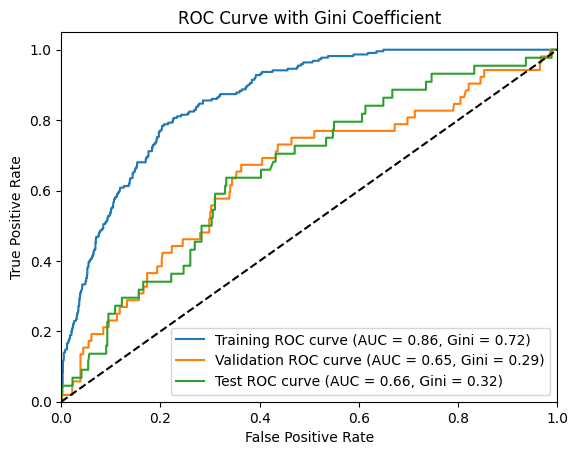

In [3]:
# Change the directory to the specified path
path = "../../2. Python/Finished Models"
os.chdir(path)

# Load the model and optimal features
xgb_model = joblib.load('xgb_model_1.pkl')
optimal_features = joblib.load('optimal_featuresxgb_model_1.pkl')

forforsta = df[['Ever90']+list(optimal_features)]

# Assume preprocessor, DataPreprocessor, base, gini_scorer are predefined
preprocessor = DataPreprocessor(forforsta)

## Scalle
(Xtrain, Ytrain),(Xval, Yval),  (Xtest, Ytest) = preprocessor.scaller(train,val, test, features =  list(optimal_features))

# Plot for both the training and validation sets
xgb_score = plot_gini(xgb_model, Xtrain, Ytrain, Xval, Yval, Xtest, Ytest, "ROC Curve with Gini Coefficient")




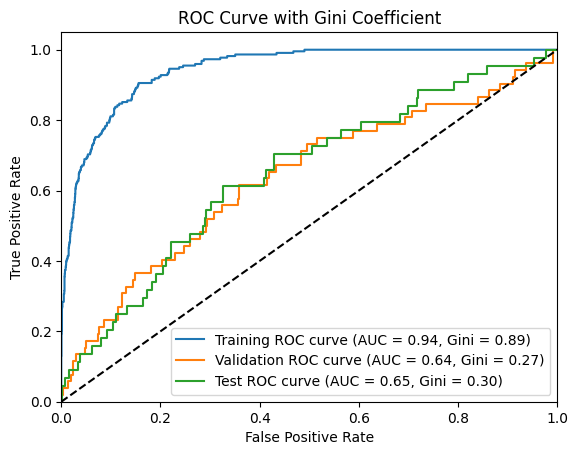

In [4]:


# Load the model and optimal features
rf_model = joblib.load('rf_model_1.pkl')
optimal_features = joblib.load('optimal_features_rf_model_1.pkl')

forforsta = df[['Ever90']+list(optimal_features)]

# Assume preprocessor, DataPreprocessor, base, gini_scorer are predefined
preprocessor = DataPreprocessor(forforsta)

## Scalle
(Xtrain, Ytrain),(Xval, Yval),  (Xtest, Ytest) = preprocessor.scaller(train,val, test, features =  list(optimal_features))

# Plot for both the training and validation sets
rf_score = plot_gini(rf_model, Xtrain, Ytrain, Xval, Yval, Xtest, Ytest, "ROC Curve with Gini Coefficient")





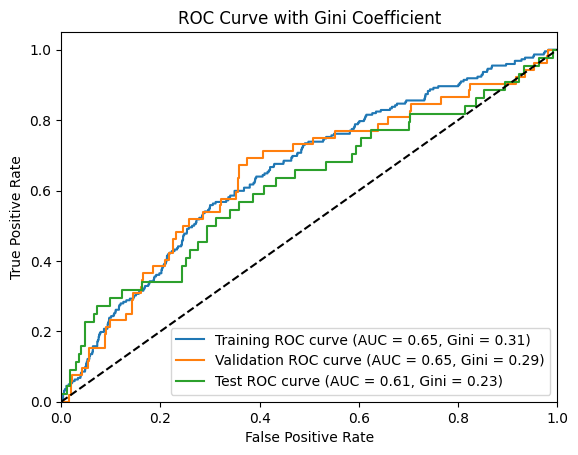

In [5]:


# Load the model and optimal features
lg_model = joblib.load('lg_model_1.pkl')
optimal_features = joblib.load('optimal_features_lg_model_1.pkl')

forforsta = df[['Ever90']+list(optimal_features)]

# Assume preprocessor, DataPreprocessor, base, gini_scorer are predefined
preprocessor = DataPreprocessor(forforsta)

## Scalle
(Xtrain, Ytrain),(Xval, Yval),  (Xtest, Ytest) = preprocessor.scaller(train,val, test, features =  list(optimal_features))

# Plot for both the training and validation sets
lg_score =  plot_gini(lg_model, Xtrain, Ytrain, Xval, Yval, Xtest, Ytest, "ROC Curve with Gini Coefficient")




## Controll - From the best RF where all data was included and no amipulation on main/co


In [6]:
scores = df[['Ever90','ApplicationID','HasCoapp']]

In [7]:
scores['lg_score'] = lg_score
scores['rf_score'] = rf_score
scores['xgb_score'] = xgb_score



In [8]:
scores

,Ever90,ApplicationID,HasCoapp,lg_score,rf_score,xgb_score
0,0,8513891,1,0.667720,0.496527,0.551595
1,0,8528123,1,0.440610,0.435203,0.462932
2,0,8621901,1,0.497513,0.416090,0.542574
3,0,8201314,1,0.440134,0.395884,0.551118
4,0,8420404,0,0.509530,0.304115,0.409541
...,...,...,...,...,...,...
481,0,8409647,0,0.501897,0.409732,0.452372
482,0,8614945,0,0.552010,0.558592,0.409977
483,0,8370396,0,0.485593,0.404523,0.434855
484,0,8649594,1,0.442187,0.329203,0.343807


In [9]:
train = scores[scores.ApplicationID.isin(train.ApplicationID)]
val = scores[scores.ApplicationID.isin(val.ApplicationID)]
test = scores[scores.ApplicationID.isin(test.ApplicationID)]

In [10]:





input = scores[['Ever90'] +['lg_score','rf_score',	'xgb_score'] ]

preprocessor = DataPreprocessor(input)

## Scalle
(Xtrain, Ytrain),(Xval, Yval),  (Xtest, Ytest) = preprocessor.scaller(train,val, test, features =  ['lg_score','rf_score',	'xgb_score'])


In [11]:
input

,Ever90,lg_score,rf_score,xgb_score
0,0,0.667720,0.496527,0.551595
1,0,0.440610,0.435203,0.462932
2,0,0.497513,0.416090,0.542574
3,0,0.440134,0.395884,0.551118
4,0,0.509530,0.304115,0.409541
...,...,...,...,...
481,0,0.501897,0.409732,0.452372
482,0,0.552010,0.558592,0.409977
483,0,0.485593,0.404523,0.434855
484,0,0.442187,0.329203,0.343807


In [12]:
Xtrain

array([[ 1.62085948,  0.72789153,  0.95307012],
       [-0.24769157,  0.27363714,  0.26192422],
       [ 0.22047618,  0.13205647,  0.8827527 ],
       ...,
       [-0.73509202,  1.2180941 ,  0.96545062],
       [ 1.15632063,  1.81999003,  1.79572271],
       [ 0.25279959, -0.61893399,  0.09552756]])

[I 2024-06-14 16:47:02,527] A new study created in memory with name: no-name-fdf40ab4-aefe-4684-9287-10b32d1dbeb6
[I 2024-06-14 16:47:02,527] A new study created in memory with name: no-name-eb401276-e05c-4230-bcc2-76b013072545
[I 2024-06-14 16:47:02,529] A new study created in memory with name: no-name-9522eee6-58a1-4d50-a556-6a70bd7ead3e
[I 2024-06-14 16:47:02,530] A new study created in memory with name: no-name-9f4e8bd7-89eb-4958-b495-4998125a87ba
[I 2024-06-14 16:47:02,582] Trial 0 finished with value: 0.8633544661746434 and parameters: {'C': 0.0016056655128861392, 'solver': 'liblinear', 'penalty_liblinear': 'l2'}. Best is trial 0 with value: 0.8633544661746434.
[I 2024-06-14 16:47:02,589] Trial 0 finished with value: 0.844247042676252 and parameters: {'nb_type': 'gaussian'}. Best is trial 0 with value: 0.844247042676252.
[I 2024-06-14 16:47:02,630] Trial 1 finished with value: 0.8438563560638782 and parameters: {'nb_type': 'gaussian'}. Best is trial 0 with value: 0.84424704267625

Best parameters: {'naive_bayes': {}, 'xgboost': {'n_estimators': 39, 'max_depth': 11, 'learning_rate': 0.10726352705448054}, 'random_forest': {'n_estimators': 26, 'max_depth': 7, 'min_samples_split': 6, 'min_samples_leaf': 3}, 'logistic_regression': {'C': 1.2597247643035956, 'solver': 'lbfgs'}}


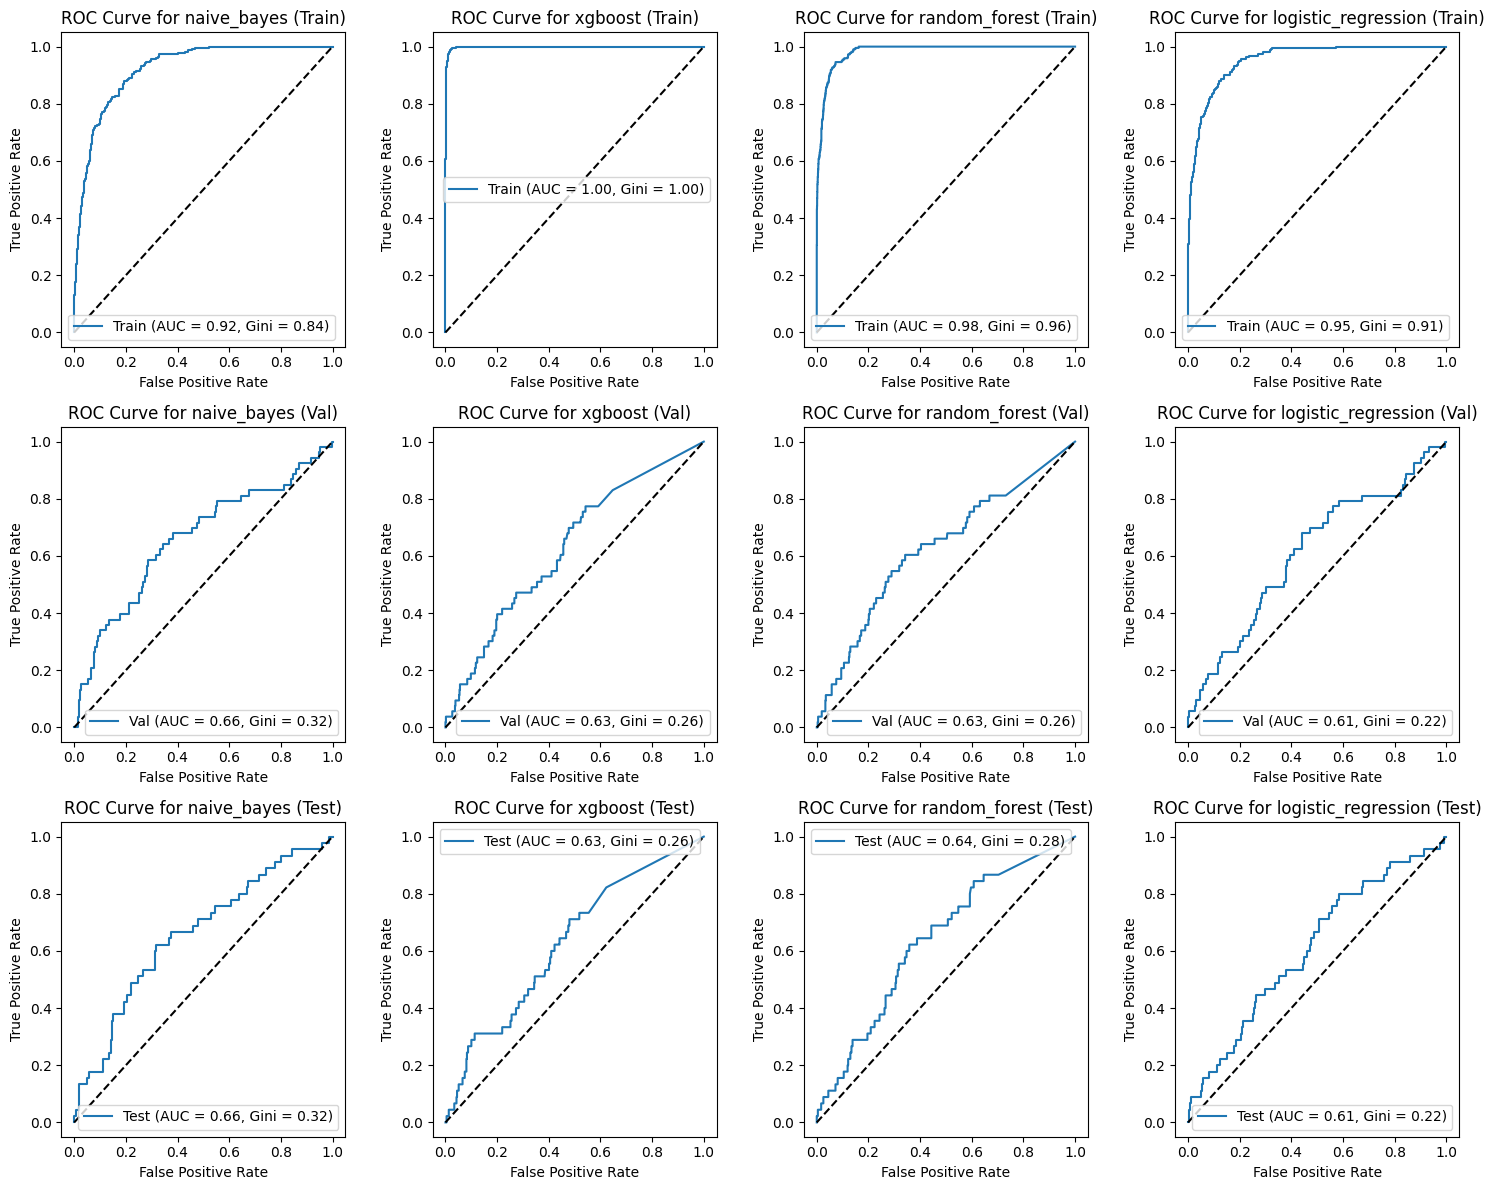

Available steps in pipeline: {'upsample': SMOTE(), 'model': RandomForestClassifier(max_depth=7, min_samples_leaf=3, min_samples_split=6,
                       n_estimators=26)}
Available steps in pipeline: {'upsample': SMOTE(), 'model': LogisticRegression(C=1.2597247643035956, max_iter=10000)}
Available steps in pipeline: {'upsample': SMOTE(), 'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.10726352705448054, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=11, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_c

Non-zero features: ['rf_score', 'xgb_score', 'lg_score']


In [13]:


models = ['naive_bayes', 'xgboost', 'random_forest', 'logistic_regression']

optimizer = ModelOptimizer(models, Xtrain, Ytrain, n_trials=iterations, early_stopping_rounds=10)
best_params, best_models = optimizer.run_models()
print("Best parameters:", best_params)

evaluator = ModelEvaluator(Xtrain, Ytrain, Xval, Yval, Xtest, Ytest, best_models)
evaluator.evaluate_models()
evaluator.plot_roc_curves()

feature_importance = FeatureImportance(input, best_models, run_correlation_cluster=True)
feature_importance.calculate_importances()
feature_importance.calculate_cumulative_importance()
features_to_keep, features_to_discard = feature_importance.find_highly_correlated_features()

print("Features to keep:", features_to_keep)
print("Features to discard:", features_to_discard)

sorted_features, non_zero_features = feature_importance.plot_importances()

# Filter away highly correlated features and take away the absolute worst
filtered_list = [item for item in sorted_features if item not in features_to_discard]
SelectionOne = filtered_list[:40]

print("Non-zero features:", non_zero_features)


In [14]:
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import make_scorer, roc_curve, auc
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import torch
from torch import nn
from torch.optim import Adam
from sklearn.base import BaseEstimator, ClassifierMixin
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Custom Torch Classifier
class TorchClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, input_dim, lr=0.001, weight_decay=0.0005, dropout_rate=0.6, num_epochs=5):
        self.input_dim = input_dim
        self.lr = lr
        self.weight_decay = weight_decay
        self.dropout_rate = dropout_rate
        self.num_epochs = num_epochs
        self.model = self._build_model()

    def _build_model(self):
        model = nn.Sequential(
            nn.Linear(self.input_dim, 128),
            nn.ReLU(),
            nn.Dropout(self.dropout_rate),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(self.dropout_rate),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )
        return model

    def fit(self, X, y):
        self.model.train()
        criterion = nn.BCELoss()
        optimizer = Adam(self.model.parameters(), lr=self.lr, weight_decay=self.weight_decay)
        dataset = TensorDataset(torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.float32))
        loader = DataLoader(dataset, batch_size=64, shuffle=True)

        for epoch in range(self.num_epochs):
            for data in loader:
                inputs, labels = data
                optimizer.zero_grad()
                outputs = self.model(inputs)
                loss = criterion(outputs.squeeze(), labels)
                loss.backward()
                optimizer.step()

    def predict_proba(self, X):
        self.model.eval()
        with torch.no_grad():
            outputs = self.model(torch.tensor(X, dtype=torch.float32))
        return outputs.numpy()

    def predict(self, X):
        proba = self.predict_proba(X)
        return (proba > 0.5).astype(int)

# Custom gini scorer
def gini_scorer(y_true, y_pred_proba):
    from sklearn.metrics import roc_auc_score
    auc = roc_auc_score(y_true, y_pred_proba)
    return 2 * auc - 1

# Plot ROC curve with Gini Coefficient
def plot_gini(model, X_train, Y_train, X_val, Y_val, X_test, Y_test, title):
    y_train_pred_proba = model.predict_proba(X_train)
    y_val_pred_proba = model.predict_proba(X_val)
    y_test_pred_proba = model.predict_proba(X_test)

    fpr_train, tpr_train, _ = roc_curve(Y_train, y_train_pred_proba)
    fpr_val, tpr_val, _ = roc_curve(Y_val, y_val_pred_proba)
    fpr_test, tpr_test, _ = roc_curve(Y_test, y_test_pred_proba)

    roc_auc_train = auc(fpr_train, tpr_train)
    roc_auc_val = auc(fpr_val, tpr_val)
    roc_auc_test = auc(fpr_test, tpr_test)

    gini_train = 2 * roc_auc_train - 1
    gini_val = 2 * roc_auc_val - 1
    gini_test = 2 * roc_auc_test - 1

    plt.figure()
    plt.plot(fpr_train, tpr_train, label=f'Training ROC curve (AUC = {roc_auc_train:.2f}, Gini = {gini_train:.2f})')
    plt.plot(fpr_val, tpr_val, label=f'Validation ROC curve (AUC = {roc_auc_val:.2f}, Gini = {gini_val:.2f})')
    plt.plot(fpr_test, tpr_test, label=f'Test ROC curve (AUC = {roc_auc_test:.2f}, Gini = {gini_test:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")

    plt.show()

    

In [15]:

# Hyperparameter tuning
# param_grid = {
#     'lr': [0.001 , 0.03 , 0.0001 , 0.0005, 0.00001],
#     'weight_decay': [0.0005 ,0.05],
#     'dropout_rate': [0.4,0.6] ,
#     'num_epochs': [6,14,20]
# }

param_grid = {
    'lr': [0.001, 0.003, 0.0008, 0.01, 0.005],
    'weight_decay': [0.0005, 0.005, 0.001, 0.01],
    'dropout_rate': [0.2, 0.4, 0.6, 0.5, 0.3],
    'num_epochs': [3, 5, 7, 9, 12, 15, 20, 25]
}

grid_search = GridSearchCV(
    estimator=TorchClassifier(input_dim=Xtrain.shape[1]),
    param_grid=param_grid,
    scoring=make_scorer(gini_scorer, needs_proba=True),
    cv=3
)

grid_search.fit(Xtrain, Ytrain)

best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Train best model
best_model = TorchClassifier(input_dim=Xtrain.shape[1], **best_params)
best_model.fit(Xtrain, Ytrain)

# Evaluate model
y_train_pred_proba = best_model.predict_proba(Xtrain)
y_val_pred_proba = best_model.predict_proba(Xval)
y_test_pred_proba = best_model.predict_proba(Xtest)

gini_train = gini_scorer(Ytrain, y_train_pred_proba)
gini_val = gini_scorer(Yval, y_val_pred_proba)
gini_test = gini_scorer(Ytest, y_test_pred_proba)


plot_gini(best_model, Xtrain, Ytrain, Xval, Yval, Xtest, Ytest, "ROC Curve with Gini Coefficient")


In [ ]:
feature_indices

Xtrain_resampled

In [ ]:
optimal_features

In [ ]:
# # Group by 'AccountNumber' and get the minimum 'Predicted_Probability' for each account
# min_probabilities = df_predictions.groupby('ApplicationID')['Probability'].min().reset_index()
# df_min_score = pd.merge(df_predictions,min_probabilities , on= ['ApplicationID','Probability'] )



# # Group by 'AccountNumber' and get the minimum 'Predicted_Probability' for each account
# max_probabilities = df_predictions.groupby('ApplicationID')['Probability'].max().reset_index()
# df_max_score = pd.merge(df_predictions,max_probabilities , on= ['ApplicationID','Probability'] )